<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> Jul 20, 2025 <strong>Author:</strong> Adnan Alaref
</div>

# **📖 1. Core Concepts of KNN.**

## Let's start with what KNN is:

* KNN is a **non-parametric**, **instance-based** learning algorithm.
  - ✅ *Non-parametric*: It does not assume any specific form (or parameters) of the underlying data distribution.
  - ✅ *Instance-based*: It does not build an explicit model during training — instead, it memorizes (stores) the training data.


* You don't train a **model** in the usual sense — you just **store** the training data.

* To make a prediction:

  1- **Measure distance** between the **query point** and **all training points**.  
  2- Select the **k** nearest neighbors.  
  3- For **classification**: take a **majority vote** of their labels.  
  4- For **regression**: take the **average** (or weighted average) of their values.


# **📖 2. How KNN Works Step by Step**

## 📌 Step 1: Choose **k**
  * *k* is the number of neighbors to consider.
    - Small *k* → more sensitive to noise (**overfit**).
    - Large *k* → more stable, but may **underfit**.

## 📌 Step 2: Choose a **distance metric**
- **Euclidean distance**:  
  $$
  \sqrt{\sum (x_i - y_i)^2}
  $$  
  (most common for continuous features)
  
- Alternatives:
  - **Manhattan distance (L1)**
  - **Minkowski distance**
  - **Cosine similarity** (for text or high-dimensional data)

- Choose based on your data type and problem.



## 📌 Step 3: **Scale your data**
* Because distance is sensitive to feature scale, you must **normalize** or **standardize** the features if they are on different scales.


## 📌 Step 4: **Predict**
* For a test point:
  - Compute distances to all training points.
  - Select the *k* nearest points.
  - Return the result:
    - Classification → majority vote.
    - Regression → mean (or weighted mean) of values.


# **📖 3.How do you choose the best k in KNN?**

## 🔷 **1. Try Multiple k Values (Empirical Search)**

### 📌 Step by step:
- Define a range of **k** values, e.g., 1–30.
- For each **k**, compute the **validation accuracy** (or error) on a validation set or using cross-validation.
- Plot **accuracy/error vs k** — this is called the **elbow method**.


## **🔷 2. Weighted Voting**

Even if **k** is large, you can weight closer neighbors more than farther ones:

- Use `weights='distance'` in `KNeighborsClassifier`.

This reduces sensitivity to the exact value of **k**.

✅ This makes **k** less critical — you can safely use a larger **k**.


## **🔷 3. Grid Search with Cross-Validation**

You can let `GridSearchCV` find the best **k** and even the best **distance metric** at the same time.

- Define a parameter grid, e.g.:
  ```python
  param_grid = {
      'n_neighbors': range(1, 31),
      'metric': ['euclidean', 'manhattan', 'minkowski']
  }


# **📖 4. When to Use KNN**

## **✅ Works well when:**
   - Data is **small to medium** (because prediction is slow).
   - Features are **meaningful** and on **comparable scales**.
   - Data is **reasonably low-dimensional**.  
   
## **🚫 Avoid when:**
   - Data is **very high-dimensional** (*curse of dimensionality*).
   - **Very large datasets** (too slow at inference time).


# **📊 5.Pros & Cons of KNN**

| ✅ **Pros**                      | 🚫 **Cons**                           |
|----------------------------------|---------------------------------------|
| Simple to understand             | Slow for big datasets                |
| No training needed               | Sensitive to irrelevant features    |
| Works for classification & regression | Struggles in high dimensions       |


---



# **◍ Step 1: Import Librares.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_regression
from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore' ,category=FutureWarning)

# **◍ Step 2: Generate Synthetic DataSet.**

In [2]:
# n_classes × n_clusters_per_class ≤ 2 ** n_informative
X,y = make_classification(n_samples=10000, n_features=10, random_state=42) # 2 Class

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


# **◍ Step 3: Scale Data.**

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **◍ Step 4: Choose Best Value For K.**

## **🔷 Try multiple k values (Empirical search)**

In [4]:
for k in [1,3,5,7,9,11,12,13,15,30]:
  knn = KNeighborsClassifier(k)
  knn.fit(X_train_scaled, y_train)

  # Predict on the test set
  y_preds = knn.predict(X_test_scaled)

  # Evaluate the performance
  acc = accuracy_score(y_test,y_preds)
  print(f"K = {k} - Accuracy: {acc * 100:.2f}%")  # On Test Set

K = 1 - Accuracy: 87.65%
K = 3 - Accuracy: 90.20%
K = 5 - Accuracy: 91.40%
K = 7 - Accuracy: 92.00%
K = 9 - Accuracy: 91.95%
K = 11 - Accuracy: 91.70%
K = 12 - Accuracy: 92.00%
K = 13 - Accuracy: 91.90%
K = 15 - Accuracy: 91.80%
K = 30 - Accuracy: 91.95%


## **🔷 Useing Croose-validation**

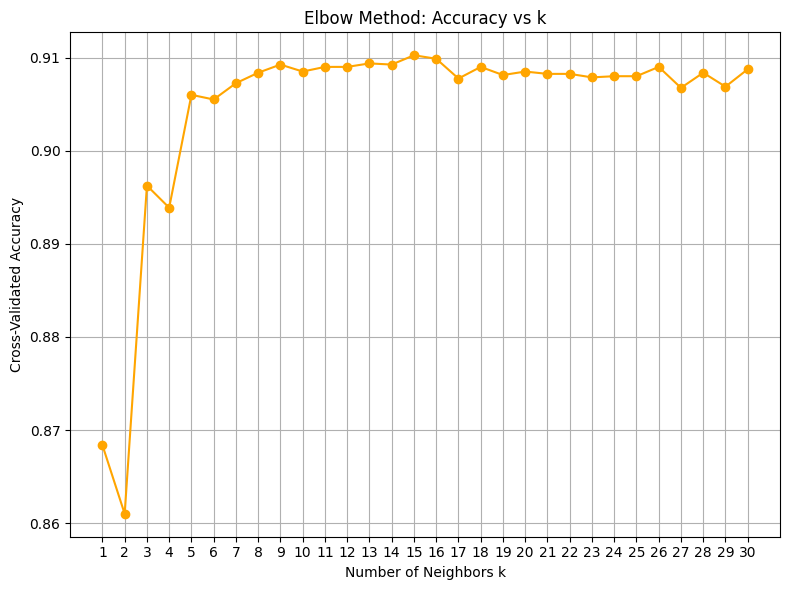

In [5]:
k_ranges = range(1,31)
cv_scores = []

for k in k_ranges:
  knn = KNeighborsClassifier(k)
  scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
  cv_scores.append(scores.mean())

# Plot accuracy/error vs k — this is called the elbow method
plt.figure(figsize=(8,6))
plt.plot(k_ranges, cv_scores, marker='o', color = 'orange')
plt.title('Elbow Method: Accuracy vs k')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_ranges)
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
# 📌 Best k
best__k = k_ranges[np.argmax(cv_scores)]
print(f"✅ Best k: {best__k:.0f} with accuracy: {max(cv_scores):.2f}")

✅ Best k: 15 with accuracy: 0.91


## **🔷 By Using GridSearchCV**


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
             'n_neighbors':range(1,31),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']}
knn_grid = KNeighborsClassifier()
grid  = GridSearchCV(estimator=knn_grid,
                     param_grid=param_grid,
                     cv=5,
                     scoring='accuracy',
                     n_jobs=-1,
                     verbose=1)
grid.fit(X_train_scaled,y_train)

# Print best parameters and score
print(f"✅ Best k: {grid.best_params_['n_neighbors']}")
print(f"✅ Best weights: {grid.best_params_['weights']}")
print(f"✅ Best metric: {grid.best_params_['metric']}")
print(f"✅ Best cross-validated accuracy: {grid.best_score_:.4f}")

# Evaluate on test set
test_score = grid.best_estimator_.score(X_test_scaled, y_test)
print(f"✅ Test set accuracy with best parameters: {test_score:.4f}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
✅ Best k: 20
✅ Best weights: uniform
✅ Best metric: manhattan
✅ Best cross-validated accuracy: 0.9209
✅ Test set accuracy with best parameters: 0.9300


### **🔵 📖 Steps to Create Heatmap of GridSearchCV Results.**

**1- Extract results into a DataFrame**

In [8]:
results_df = pd.DataFrame(grid.cv_results_)
results_df.head()  # Show all DataFrame cols

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015620,0.002439,0.231910,0.012480,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.873125,0.871250,0.870625,0.867500,0.859375,0.868375,0.004851,173
1,0.016012,0.002105,0.133397,0.012569,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.873125,0.871250,0.870625,0.867500,0.859375,0.868375,0.004851,173
2,0.014376,0.001353,0.273017,0.017859,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.865000,0.868750,0.856875,0.846875,0.867500,0.861000,0.008183,179
3,0.015077,0.002201,0.143045,0.008405,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.873125,0.871250,0.870625,0.867500,0.859375,0.868375,0.004851,173
4,0.014839,0.001715,0.279230,0.021669,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.889375,0.906875,0.898125,0.893750,0.893125,0.896250,0.005995,163


**2- Select the columns of interest.**

In [9]:
results_df[['param_n_neighbors', 'param_weights', 'mean_test_score']].head()

,param_n_neighbors,param_weights,mean_test_score
0,1,uniform,0.868375
1,1,distance,0.868375
2,2,uniform,0.861000
3,2,distance,0.868375
4,3,uniform,0.896250


In [10]:
results_df[['param_n_neighbors', 'param_metric', 'mean_test_score']].sample(5)

,param_n_neighbors,param_metric,mean_test_score
47,24,euclidean,0.909375
83,12,manhattan,0.919375
49,25,euclidean,0.908750
159,20,minkowski,0.909000
103,22,manhattan,0.918375


**3- Create a pivot table.**  
* We need to reshape the DataFrame to a matrix suitable for a heatmap:  
  - Rows: n_neighbors
  - Columns: metric
  - Values: mean_test_score

In [11]:
# Note To avoid This error ValueError: Index contains duplicate entries, cannot reshape
# We create two povit table one for uniform weigth and another for distance
df_uniform = results_df[results_df['param_weights'] == 'uniform']
df_distace = results_df[results_df['param_weights'] == 'distance']

In [12]:
pivot_uniform = df_uniform.pivot(
    index='param_n_neighbors',
    columns='param_metric',
    values='mean_test_score'
).sort_index()

pivot_distance = df_distace.pivot(
    index='param_n_neighbors',
    columns='param_metric',
    values='mean_test_score'
).sort_index()

 **4- Plot the heatmap.**

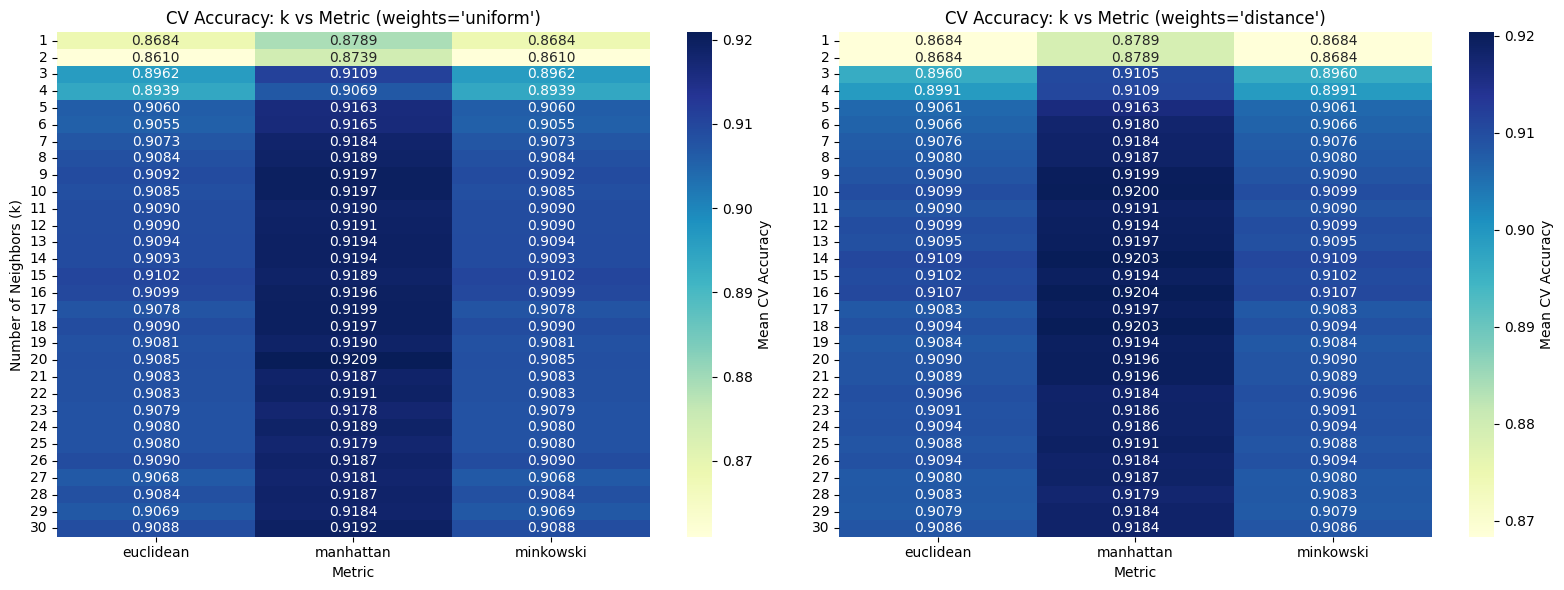

In [13]:
fig ,ax = plt.subplots(nrows=1, ncols=2, figsize = (16,6))

sns.heatmap(
    pivot_uniform,
    annot=True, fmt=".4f", cmap="YlGnBu",
    cbar_kws={'label': 'Mean CV Accuracy'},
    ax=ax[0]
)
ax[0].set_title("CV Accuracy: k vs Metric (weights='uniform')")
ax[0].set_xlabel("Metric")
ax[0].set_ylabel("Number of Neighbors (k)")

sns.heatmap(
    pivot_distance,
    annot=True, fmt=".4f", cmap="YlGnBu",
    cbar_kws={'label': 'Mean CV Accuracy'},
    ax=ax[1]
)
ax[1].set_title("CV Accuracy: k vs Metric (weights='distance')")
ax[1].set_xlabel("Metric")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()


## **📖 Summary:**

| **Method**         | **Best k** | **Why**                                       |
|---------------------|------------|-----------------------------------------------|
| Test set only       | k = 7     | Overfits to test split                       |
| Manual CV only      | k = 15     | Reasonable, but ignores weights             |
| GridSearchCV        | k = 20     | Best CV accuracy with more parameters       |

✅ **Correct approach**: Use **k = 20** from GridSearchCV, then evaluate on the test set.


# **◍ Step 5: Train The Final Model.**

In [14]:
best_knn = grid.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Predict on the test set
preds = best_knn.predict(X_test_scaled)

 # Get distances and indices of the K nearest neighbors
distances ,indxs = best_knn.kneighbors(X_test_scaled)

# Evaluate the performance
test_score = best_knn.score(X_test_scaled, y_test)
print(f"✅ Test set accuracy: {test_score:.4f}\n")

print(f"Classification Report : \n {classification_report(y_test,preds)}")

✅ Test set accuracy: 0.9300

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       997
           1       0.92      0.95      0.93      1003

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



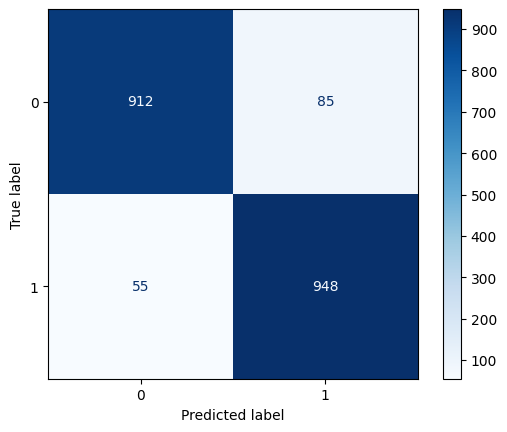

In [15]:
ConfusionMatrixDisplay.from_estimator(best_knn, X_test_scaled, y_test, cmap="Blues")
plt.show()

# **◍ Step 6: Custom Knn Implemintaion.**

In [16]:
class KNN:
  def __init__(self, k = 3, task = "Classification"):
    self.k = k
    self.task = task.lower()

  # Just store data
  def fit(self, X, y):
    self.X_train, self.y_train = X , y

  def predict(self, X):
    return np.array([self._predict(x) for x in X])

  def _predict(self, x):
    distances = [np.sum((x - x_train)**2) for x_train in self.X_train]
    k_indxes = np.argsort(distances)[:self.k]

    knn_outputs = [self.y_train[i] for i in k_indxes]

    if self.task=="classification":
      most_freq = Counter(knn_outputs).most_common(1) # [(lable, freqs)]
      return most_freq[0][0]  # Return lable

    elif self.task == "regression":
      avg = np.mean(knn_outputs)
      return avg

  # Using KNN for decover anomalies data
  def is_anomly(self, x):
    threshold = 1.0
    distance = [np.sum((x-x_train)**2) for x_train in X_train]
    kth_distances = np.sort(distance)[self.k-1]
    return kth_distances > threshold * threshold   # Code track because when not take sqrt() when we calc Euclidean distance

## **🔷 Try Custom Implemintaion For Classification Task:**

In [17]:
X_class,y_class = make_classification(n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

knn_custom = KNN(k=3,task="Classification")
knn_custom.fit(X_train_class_scaled,y_train_class)

y_pred = knn_custom.predict(X_test_class_scaled)

acc = accuracy_score(y_test_class, y_pred)
print(f"\nK = {knn_custom.k} - Classification Accuracy: {acc * 100:.2f}%\n")


K = 3 - Classification Accuracy: 96.00%



## **🔷 Try Custom Implemintaion For Regression Task:**

In [18]:
# Generate and test on regression dataset
X_regress, y_regress = make_regression(n_samples=500, n_features=2, noise=0.1, random_state=42)
X_train_regress, X_test_regress, y_train_regress, y_test_regress = train_test_split(X_regress, y_regress, test_size=0.2,
                                                                                    random_state=42)
scaler = StandardScaler()
X_train_regrss_scaled = scaler.fit_transform(X_train_regress)
X_test_class_scaled = scaler.transform(X_test_regress)

knn_regress = KNN(k=3, task='Regression')
knn_regress.fit(X_train_regress, y_train_regress)

y_pred_regress = knn_regress.predict(X_test_regress)
mse = mean_squared_error(y_test_regress, y_pred_regress)
print(f"Regression MSE: {mse:.2f}")

Regression MSE: 2.92


**📌 Conclusion**   
We implemented a custom K-Nearest Neighbors classifier from scratch, demonstrating its core concepts: storing data, computing distances, and majority voting. This hands-on approach deepens understanding of KNN’s mechanics and shows its simplicity and effectiveness. For larger datasets, further optimizations and vectorized computations are recommended.

<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>